<a href="https://colab.research.google.com/github/sbs23003/CA-Contstruction-Industry/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m spacy download en_core_web_lg 
!pip install emoji
!pip install transformers
!pip install spacy
!pip install langdetect
!pip install git+https://github.com/sbs23003/snscrape.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 568.4 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached emoji-2.4.0.tar.gz (353 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=827ad43e8b509d53fd13349367aaff691e58f6ed64123684cad1d58051996983
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
Looking in indexes: https

In [59]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import emoji
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import re  
import spacy
#nlp = spacy.load("en_core_web_lg")
from textblob import TextBlob
import snscrape.modules.twitter as sntwitter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Setting variables to be used below
maxTweets = 2

# Creating list to append tweet data to
tweets_list1 = []


search = ['housing market', 'construction sector', 'construction', 'construction costs', 'labour costs', 'housing prices', 'property developers', 'housing prices', 'construction prices', 'building developments']
#Genious move
queries = []
for item in search:
    queries.append(item + ' near:dublin until:2023-05-23 since:2022-01-01')
    queries.append(item + ' near:Ireland until:2023-05-23 since:2022-01-01')


for q in queries:
    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'{q}').get_items()):

        #print(tweet.user.username)
        if i>maxTweets:  break
        tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.location])

<ipython-input-3-d9a2b966f0cd>:22: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.location])


OSullivanCormac
alanlawlor
shawlerstyle
garyshawgolf


scottwa16150732
RebelTVIreland
Dlat86


lci_ireland
eosfuturedesign
alanlawlor
Robbiecousins


LokiGhost_
businessposthq
Orla_Hegarty
SnowbieWx


Leslie79572927
YouKnowWhoIAmIE
stephendpmoore
mmc_ireland


votemaryfitz
ConorCooney3
joequinn08
ConallOM


labour
meltedlaughter
pbmosligo
ciaranahern


UpsyDaisy666_
RuthCoppingerSP
eosfuturedesign
IsMiseMarcas
ruairijfahy


etienneshrdlu
abjdillon
RobLooseCannon
alanlawlor


YouKnowWhoIAmIE
VorpalNabaztag


UpsyDaisy666_
RuthCoppingerSP
eosfuturedesign
IsMiseMarcas
ruairijfahy


ronda137177821
TheOtherGordon
AriffShihab
AriffShihab


alanlawlor
TraceyM12367809
DarmodyArch
TraceyM12367809
lelaurajane


In [25]:
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Location'])

In [27]:
def clean_chars(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #remove @
    text = re.sub('#', '', text) #remove #
    text = re.sub('RT[\s]+', '', text) # Remove RT
    text = re.sub('https?:\/\/\S+', '', text) # Remove hyperlink
    text = re.sub('&amp','', text)# remove HTML 
    text = re.sub(r"[^a-zA-Zà-úÀ-Ú0-9]", " ", text.lower()) # lowercase
    return text

In [28]:
tweets_df1['Text'] = tweets_df1['Text'].apply(clean_chars)

In [29]:
tweets_df1

,Datetime,Tweet Id,Text,Username,Location
0,2023-05-22 16:03:44+00:00,1660677834543714306,j will be delighted to see most of the indust...,OSullivanCormac,"Dublin, Ireland"
1,2023-05-11 11:31:11+00:00,1656622979776651268,housing govt can t interfere in the free m...,alanlawlor,"Dublin, Ireland"
2,2023-05-11 11:08:34+00:00,1656617289289007104,great talk from housing market expert and lead...,shawlerstyle,insta/sc @shawlerstyle
3,2023-05-22 18:06:33+00:00,1660708743208640519,stay in this shit hole couldn t build a wendy...,scottwa16150732,ireland
4,2023-05-22 17:26:46+00:00,1660698731912544275,varadkar said he wouldn t consider himself to...,RebelTVIreland,Ireland
5,2023-05-22 12:17:53+00:00,1660620997068726272,charlie this guy is just emotionally invested...,Dlat86,Ireland
6,2023-05-22 10:42:16+00:00,1660596933805703170,lean construction ireland national conference ...,lci_ireland,"Dublin City, Ireland"
7,2023-01-01 12:43:48+00:00,1609530831357501443,the state must be directly involved in const...,eosfuturedesign,"Dublin, Tipperary, Westmeath"
8,2022-11-03 19:18:01+00:00,1588249157193474049,when a significant amount of ireland s tax i...,alanlawlor,"Dublin, Ireland"
9,2023-05-22 18:51:19+00:00,1660720010187120652,1786 625 wait pipehitter stopped construction,LokiGhost_,Dublin


In [38]:
 tweets_df1.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Location'], dtype='object')

In [42]:
tweets_df1 = tweets_df1.drop(columns=['Datetime', 'Tweet Id', 'Username', 'Location'])

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tweets_df1['Subjectivity'] = tweets_df1['Text'].apply(getSubjectivity)
tweets_df1['Polarity'] = tweets_df1['Text'].apply(getPolarity)

tweets_df1

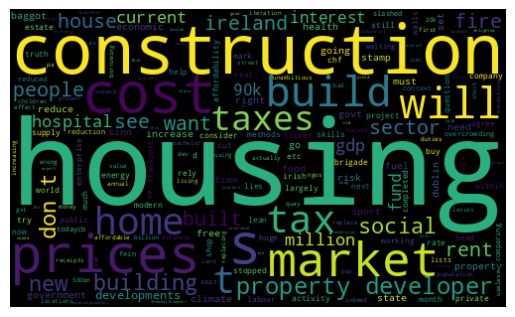

In [48]:
allWords = ' '.join( [twts for twts in tweets_df1['Text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [49]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets_df1['Analysis'] = tweets_df1['Polarity'].apply(getAnalysis)

tweets_df1

,Text,Subjectivity,Polarity,Analysis
0,j will be delighted to see most of the indust...,0.600000,0.600000,Positive
1,housing govt can t interfere in the free m...,0.800000,0.400000,Positive
2,great talk from housing market expert and lead...,0.448333,0.285000,Positive
3,stay in this shit hole couldn t build a wendy...,0.400000,-0.060000,Negative
4,varadkar said he wouldn t consider himself to...,0.105556,-0.150000,Negative
5,charlie this guy is just emotionally invested...,0.599091,-0.074545,Negative
6,lean construction ireland national conference ...,0.000000,0.000000,Neutral
7,the state must be directly involved in const...,0.415000,0.060000,Positive
8,when a significant amount of ireland s tax i...,0.425893,0.072321,Positive
9,1786 625 wait pipehitter stopped construction,0.000000,0.000000,Neutral


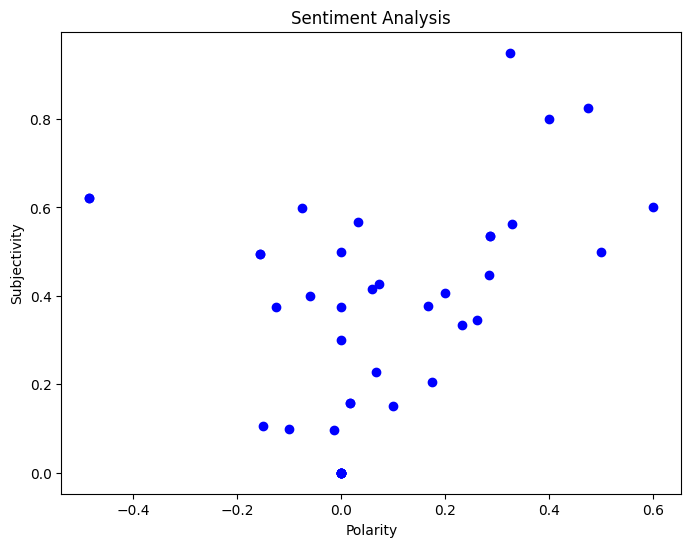

In [50]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(tweets_df1['Polarity'][i], tweets_df1['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

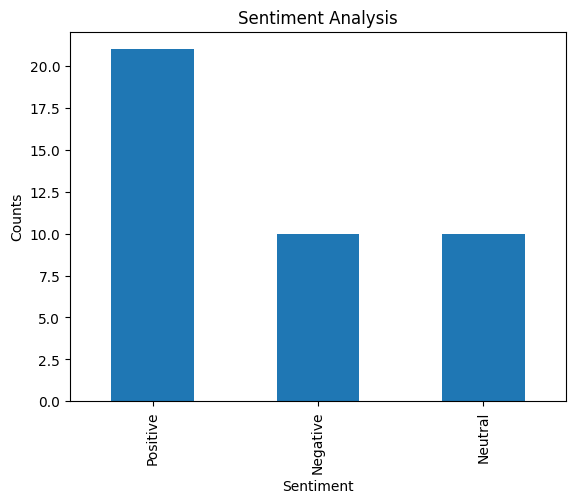

In [97]:
tweets_df1['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df1['Analysis'].value_counts().plot(kind='bar')
plt.show()

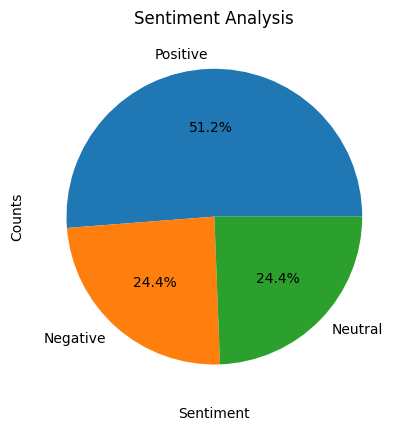

In [98]:
tweets_df1['Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [53]:
from collections import Counter
tweets_df1['temp_list'] = tweets_df1['Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweets_df1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,48
1,in,37
2,and,33
3,to,26
4,of,26
5,housing,26
6,a,26
7,is,21
8,construction,19
9,s,12


In [57]:
def emoji_cleaning(text):
    
  # Change emoji to text
  text = emoji.demojize(text).replace(":", " ")
  
  # Delete repeated emoji
  tokenizer = text.split()
  repeated_list = []
  
  for word in tokenizer:
      if word not in repeated_list:
          repeated_list.append(word)
  
  text = ' '.join(text for text in repeated_list)
  text = text.replace("_", " ").replace("-", " ")
  return text
    

def clean_urls(review):
    review = review.split()
    review = ' '.join([word for word in review if not re.match('^http', word)])
    return review

def decontracted(text):
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"it\'s", "it is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\“", "", text)
    text = re.sub(r"\”", "", text)
    text = re.sub(r"\…", "", text)

    return text


def clean_text(text):
    text = str(text)
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'pic.twitter\S+', ' ', text)
    text = re.sub(r'#', '', text)
    text = text.lower()

    return text

stop_words = stopwords.words('english') 
stop_words.remove('not') 
lemmatizer = WordNetLemmatizer()


def data_preprocessing(review):
    
  # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
    review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
    review = review.lower()
  
  # tokenization
    tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
    review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
    review = ' '.join(review)
    return review

In [62]:
tweets_df1['clean_text'] = tweets_df1['Text'].apply(clean_urls).apply(clean_text).apply(emoji_cleaning).apply(decontracted)
tweets_df1['clean_text'] = tweets_df1['clean_text'].apply(lambda review: data_preprocessing(review))

#.apply(correct_spellings)
tweets_df1.head()

,Text,Subjectivity,Polarity,Analysis,temp_list,clean_text
0,j will be delighted to see most of the indust...,0.600000,0.600,Positive,"[j, will, be, delighted, to, see, most, of, th...",j delighted see industrial estate upgraded hou...
1,housing govt can t interfere in the free m...,0.800000,0.400,Positive,"[housing, govt, can, t, interfere, in, the, fr...",housing govt interfere free market without scr...
2,great talk from housing market expert and lead...,0.448333,0.285,Positive,"[great, talk, from, housing, market, expert, a...",great talk housing market expert leader cooke ...
3,stay in this shit hole couldn t build a wendy...,0.400000,-0.060,Negative,"[stay, in, this, shit, hole, couldn, t, build,...",stay shit hole build wendy house toy shop fg f...
4,varadkar said he wouldn t consider himself to...,0.105556,-0.150,Negative,"[varadkar, said, he, wouldn, t, consider, hims...",varadkar said consider tory admitted might pas...


In [66]:
tweets_df1['temp_list'] = tweets_df1['clean_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweets_df1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,housing,20
1,construction,16
2,price,11
3,tax,10
4,cost,10
5,property,9
6,market,7
7,home,6
8,developer,6
9,build,5


In [67]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [70]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(tweets_df1.iterrows(), total=len(tweets_df1)):
    text = row['clean_text']
    #print(row['clean_text'])
    myid = i
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/41 [00:00<?, ?it/s]

In [71]:
res

{0: {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.8625},
 1: {'neg': 0.135, 'neu': 0.557, 'pos': 0.307, 'compound': 0.418},
 2: {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.7906},
 3: {'neg': 0.242, 'neu': 0.611, 'pos': 0.147, 'compound': -0.5984},
 4: {'neg': 0.33, 'neu': 0.412, 'pos': 0.258, 'compound': -0.5859},
 5: {'neg': 0.088, 'neu': 0.726, 'pos': 0.186, 'compound': 0.4767},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.4019},
 8: {'neg': 0.333, 'neu': 0.616, 'pos': 0.05, 'compound': -0.8779},
 9: {'neg': 0.388, 'neu': 0.612, 'pos': 0.0, 'compound': -0.2263},
 10: {'neg': 0.158, 'neu': 0.658, 'pos': 0.184, 'compound': 0.1027},
 11: {'neg': 0.084, 'neu': 0.804, 'pos': 0.112, 'compound': 0.2023},
 12: {'neg': 0.483, 'neu': 0.289, 'pos': 0.228, 'compound': -0.8724},
 13: {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15:

In [72]:
vaders = pd.DataFrame(res).T
#vaders = vaders.reset_index().rename(columns={'index': 'Id'})
#vaders = vaders.merge(df, how='left')
vaders = pd.concat([tweets_df1, vaders], axis=1)

In [73]:
vaders['clean_text']

0     j delighted see industrial estate upgraded hou...
1     housing govt interfere free market without scr...
2     great talk housing market expert leader cooke ...
3     stay shit hole build wendy house toy shop fg f...
4     varadkar said consider tory admitted might pas...
5     charlie guy emotionally invested housing marke...
6     lean construction ireland national conference ...
7     state must directly involved construction pres...
8     significant amount ireland tax came constructi...
9                  wait pipehitter stopped construction
10    new fire safety regs must account modern const...
11    dublin fire brigade made submission dept housi...
12    ie skill alright not construction like destruc...
13    agree go build rely property developer set sta...
14    much private enterprise built construction ste...
15    highlighted rising construction cost delaying ...
16    government contributes circa take tax construc...
17    energy construction cost also bigger proje

In [74]:
# Define a function to categorize the values
def categorize_compound(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create the new column 'category'
vaders['category'] = vaders['compound'].apply(lambda x: categorize_compound(x))

In [75]:
vaders.head()


,Text,Subjectivity,Polarity,Analysis,temp_list,clean_text,neg,neu,pos,compound,category
0,j will be delighted to see most of the indust...,0.600000,0.600,Positive,"[j, delighted, see, industrial, estate, upgrad...",j delighted see industrial estate upgraded hou...,0.000,0.510,0.490,0.8625,Positive
1,housing govt can t interfere in the free m...,0.800000,0.400,Positive,"[housing, govt, interfere, free, market, witho...",housing govt interfere free market without scr...,0.135,0.557,0.307,0.4180,Positive
2,great talk from housing market expert and lead...,0.448333,0.285,Positive,"[great, talk, housing, market, expert, leader,...",great talk housing market expert leader cooke ...,0.000,0.750,0.250,0.7906,Positive
3,stay in this shit hole couldn t build a wendy...,0.400000,-0.060,Negative,"[stay, shit, hole, build, wendy, house, toy, s...",stay shit hole build wendy house toy shop fg f...,0.242,0.611,0.147,-0.5984,Negative
4,varadkar said he wouldn t consider himself to...,0.105556,-0.150,Negative,"[varadkar, said, consider, tory, admitted, mig...",varadkar said consider tory admitted might pas...,0.330,0.412,0.258,-0.5859,Negative


In [76]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [78]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [80]:
res = {}
for i, row in tqdm(vaders.iterrows(), total=len(vaders)):
    try:
        text = row['clean_text']
        myid = i
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/41 [00:00<?, ?it/s]

In [81]:
results_df = pd.DataFrame(res).T
#results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = pd.concat([vaders, results_df], axis=1)

In [84]:
results_df.columns

Index(['Text', 'Subjectivity', 'Polarity', 'Analysis', 'temp_list',
       'clean_text', 'neg', 'neu', 'pos', 'compound', 'category', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

In [82]:
columns_to_drop = ['polarity_score']
results_df = results_df.drop(columns=columns_to_drop)
results_df

KeyError: ignored

In [85]:
# Define the conditions and corresponding values
df = results_df.copy()
conditions = [
    (df['roberta_neg'] > df['roberta_neu']) & (df['roberta_neg'] > df['roberta_pos']),
    (df['roberta_neu'] > df['roberta_neg']) & (df['roberta_neu'] > df['roberta_pos']),
    (df['roberta_pos'] > df['roberta_neg']) & (df['roberta_pos'] > df['roberta_neu'])
]
values = ['Negative', 'Neutral', 'Positive']

# Use numpy.select() to assign values based on conditions
df['rob_compound'] = np.select(conditions, values, default='Unknown')

In [90]:
#df = df.drop(columns = ['Text', 'temp_list'])
df.head()

,Subjectivity,Polarity,Analysis,clean_text,neg,neu,pos,compound,category,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rob_compound
0,0.600000,0.600,Positive,j delighted see industrial estate upgraded hou...,0.000,0.510,0.490,0.8625,Positive,0.000,0.510,0.490,0.8625,0.024038,0.211447,0.764516,Positive
1,0.800000,0.400,Positive,housing govt interfere free market without scr...,0.135,0.557,0.307,0.4180,Positive,0.135,0.557,0.307,0.4180,0.394333,0.581350,0.024317,Neutral
2,0.448333,0.285,Positive,great talk housing market expert leader cooke ...,0.000,0.750,0.250,0.7906,Positive,0.000,0.750,0.250,0.7906,0.003940,0.050650,0.945410,Positive
3,0.400000,-0.060,Negative,stay shit hole build wendy house toy shop fg f...,0.242,0.611,0.147,-0.5984,Negative,0.242,0.611,0.147,-0.5984,0.955287,0.040947,0.003766,Negative
4,0.105556,-0.150,Negative,varadkar said consider tory admitted might pas...,0.330,0.412,0.258,-0.5859,Negative,0.330,0.412,0.258,-0.5859,0.825692,0.166035,0.008273,Negative


In [92]:
clean_df = df[(df['Analysis'] == df['category']) & (df['Analysis'] == df['rob_compound'])]

clean_df.head()

,Subjectivity,Polarity,Analysis,clean_text,neg,neu,pos,compound,category,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rob_compound
0,0.600000,0.600,Positive,j delighted see industrial estate upgraded hou...,0.000,0.510,0.490,0.8625,Positive,0.000,0.510,0.490,0.8625,0.024038,0.211447,0.764516,Positive
2,0.448333,0.285,Positive,great talk housing market expert leader cooke ...,0.000,0.750,0.250,0.7906,Positive,0.000,0.750,0.250,0.7906,0.003940,0.050650,0.945410,Positive
3,0.400000,-0.060,Negative,stay shit hole build wendy house toy shop fg f...,0.242,0.611,0.147,-0.5984,Negative,0.242,0.611,0.147,-0.5984,0.955287,0.040947,0.003766,Negative
4,0.105556,-0.150,Negative,varadkar said consider tory admitted might pas...,0.330,0.412,0.258,-0.5859,Negative,0.330,0.412,0.258,-0.5859,0.825692,0.166035,0.008273,Negative
6,0.000000,0.000,Neutral,lean construction ireland national conference ...,0.000,1.000,0.000,0.0000,Neutral,0.000,1.000,0.000,0.0000,0.015568,0.888825,0.095607,Neutral


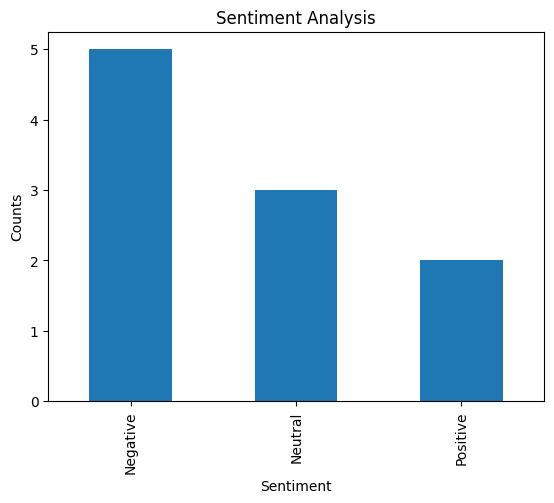

In [96]:
clean_df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
clean_df['Analysis'].value_counts().plot(kind='bar')
plt.show()

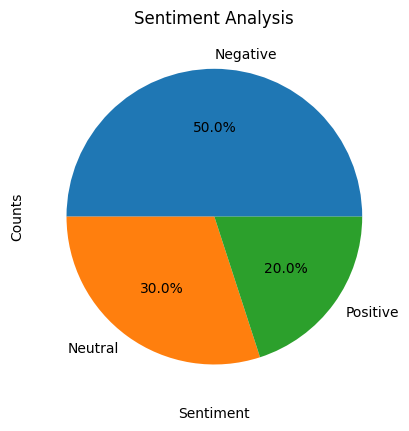

In [94]:

clean_df['Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()